
<!DOCTYPE html>
<html>
<head>
    <style>
        .center-image {
            display: block;
            margin: 0 auto;
        }
    </style>
</head>
<body>
    <img src="https://datascientest.com/es/wp-content/uploads/sites/7/2020/11/illu_regression_blog-16.png" alt="ilustracion" class="center-image">
</body>
</html>





### Lista de Pasos para Crear un Modelo de Regresión Logística

1. **Importación de Librerías**: Importar las librerías necesarias para la manipulación, visualización y modelado de datos.
2. **Carga de Datos**: Cargar el conjunto de datos desde un archivo CSV.
3. **Exploración de Datos**: Explorar y entender la estructura de los datos.
4. **Preprocesamiento de Datos**: Convertir variables categóricas, dividir datos en características y etiquetas, y escalar las características.
5. **División del Conjunto de Datos**: Dividir los datos en conjuntos de entrenamiento y prueba.
6. **Entrenamiento del Modelo**: Entrenar el modelo de regresión logística con el conjunto de entrenamiento.
7. **Evaluación del Modelo**: Evaluar el modelo utilizando métricas de rendimiento.
8. **Visualización de Resultados**: Visualizar los resultados de la evaluación.


A conuacion relizaremos un modelo de regresion logistica basico para ilustrar. Cabe destacar que en la diaria del cientifico de datos. este procedimiento no será nada censillo. y tomara mucho mas analisis, codigo, etc.  es por esto que este notebook es a modo de ilustracion con datos imberosimiles. es importante que se tenga en cuenta esto para cuando se necesite realizar un modelo de regresion logistica. Este note es complemento del contenido del [blog Nodo - Data](https://nododata.blogspot.com/2024/05/regresion-logistica.html) 👽



## Importación de bibliotecas
Comenzaremos importando las bibliotecas necesarias para nuestro análisis y modelo.

In [149]:
# librerías necesarias:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Carga de datos
A continuación, procedemos con la carga de datos para nuestro análisis. Los datos son de la plataforma kaggel acontinuacion te dejo el [Link](https://www.kaggle.com/datasets/dragonheir/logistic-regression) para que puedas verlos.

In [150]:
# Carga de Datos
df = pd.read_csv("Social_Network_Ads.csv")

## Consistencia de datos
En esta parte, nos enfocaremos en explorar la consistencia estructural de los datos. Revisaremos el tipo de variables presentes y si existen valores nulos o faltantes. Esta exploración nos permitirá comprender mejor la calidad de los datos antes de proceder con el análisis y la modelización.

In [151]:
# Informacion estructural de nuestros datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [152]:
df.describe(include= 'all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [153]:
# Elminamos la columna que no nos sirve
df = df.drop(['User ID'],axis=1)

In [154]:
# Conclusiones:

#- Se cuenta con un total de 400 registros, cada uno representando a una persona distinta identificada por un identificador único.
#- De las 5 variables disponibles, 4 son relevantes para nuestro análisis, ya que una de ellas corresponde al identificador único. Las variables incluyen:

#- Gender: Variable categórica nominal que representa el género de la persona.
#- Age: Variable numérica discreta que indica la edad de la persona.
#- EstimatedSalary: Variable numérica continua que representa el salario estimado de la persona.
#- Purchased: Variable dicotómica que sirve como variable objetivo a predecir, indicando si la persona realizó una compra o no.

In [155]:
# Valores nuelos en nuestros datos
nulo = df.isnull().sum()
print(nulo)

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [156]:
# Conclusiones:

#- Después de realizar un Vision inicial de los datos, se observa que no se encuentran valores nulos en las columnas de interés.
#- Todos los valores parecen ser válidos y no requieren un tratamiento especial en esta etapa del análisis.

In [157]:
# Variable Objetivo
print(df['Purchased'].value_counts())


Purchased
0    257
1    143
Name: count, dtype: int64


In [158]:
#- Conclusiones:
#- Se ha realizado un análisis de la variable objetivo 'Purchased', la cual presenta dos valores posibles: 1 (realizó la compra)
#- y 0 (no realizó la compra). Es importante destacar que se observa un desbalance en los datos, lo cual puede ocasionar
#- problemas en la construcción del modelo predictivo. 

#- Para ilustrar este punto, consideremos un ejemplo hipotético: supongamos que tenemos 100 fotos, de las cuales 90 son de autos
#- y 10 son de motos. Si entrenamos un modelo para identificar si en una foto hay un auto o una moto, y dado el desbalance de clases,
#- es posible que el modelo clasifique todas las fotos como autos para maximizar su precisión. Aunque este modelo tendría una alta precisión
#- (90%), en realidad no está aprendiendo a distinguir entre autos y motos, sino que simplemente está prediciendo la clase mayoritaria.

#- Por lo tanto, es fundamental abordar el desbalance de clases en los datos para evitar sesgos en el modelo y garantizar su capacidad de generalización.

In [159]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


<div style="width: 100%; height: 200px; background-color: #1EA4D9; border-radius: 20px; display: flex; justify-content: center; align-items: center; color: white; font-size: 24px; font-weight: bold; letter-spacing: 2px;">
 Analisis y Visualización de Datos
</div>

A continuación, vamos a explorar los datos mediante una serie de gráficos que nos ayudarán a comprender mejor nuestra información y facilitarán la tarea de modelado posterior. Cada gráfico estará acompañado de una interpretación detallada, lo que resulta fundamental para evitar interpretaciones incorrectas en el futuro. Es crucial que los notebooks que creemos sean atemporales y fáciles de entender, especialmente en proyectos reales.

In [160]:
#Definimos la paleta de colores que vamos a utilizar. 
paleta = ("#f72585", "#4cc9f0")

A continuación, crearemos un gráfico de torta para analizar la proporción de género en nuestros datos. Es importante tener en cuenta que nuestra variable objetivo, "Purchased", indica si el cliente realizó una compra o no. En ocasiones, nos enfrentamos a situaciones en las que la variable objetivo no está claramente definida, pero en este caso, es crucial basar nuestro análisis en esta variable. Estamos buscando patrones que puedan explicar la relación entre la variable objetivo y las demas.

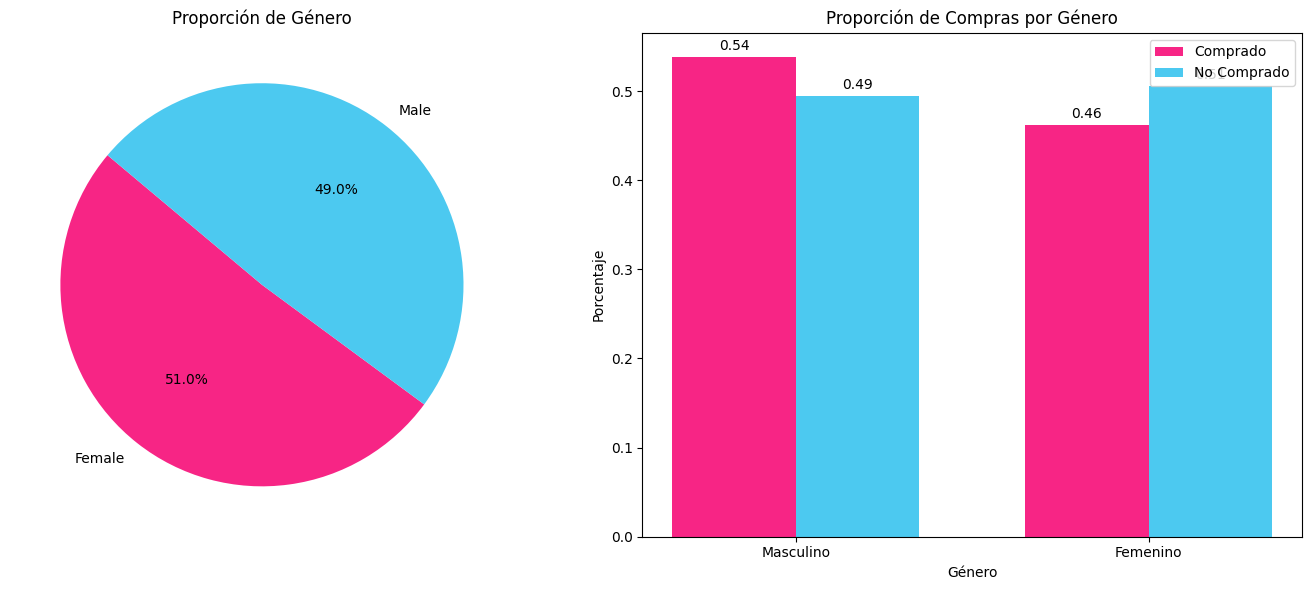

In [161]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

gender_counts = df['Gender'].value_counts()
ax1.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=paleta, startangle=140)
ax1.set_title('Proporción de Género')

grouped = df.groupby('Purchased')['Gender'].value_counts(normalize=True).unstack()

bar_width = 0.35
index = np.arange(len(grouped.columns))

bars_male = ax2.bar(index - bar_width/2, grouped.loc[1], bar_width, label='Comprado', color=paleta[0])
bars_female = ax2.bar(index + bar_width/2, grouped.loc[0], bar_width, label='No Comprado', color=paleta[1])

for bars in [bars_male, bars_female]:
    for bar in bars:
        height = bar.get_height()
        ax2.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

ax2.set_xlabel('Género')
ax2.set_ylabel('Porcentaje')
ax2.set_title('Proporción de Compras por Género')
ax2.set_xticks(index)
ax2.set_xticklabels(['Masculino', 'Femenino'])
ax2.legend()

plt.tight_layout()
plt.show()

In [162]:
# Interpretacion: 

# Como podemos observar en el gráfico de la izquierda, la proporción de género en nuestros datos está equilibrada,
# siendo el género femenino el más registrado con un 51%.

# En el gráfico de la derecha, podemos ver cómo se relaciona el género con la variable objetivo. En este caso,
# notamos una diferencia entre el género masculino y femenino, siendo los hombres los clientes que más compran, con un 54% de compras.

In [163]:
# Interpretacion:
# Analizando los datos podemos obsercar que en cuanto a genero los hombres son los que mas compran en comparacion que las mujeres 

Una vez que tenemos la proporción de géneros con la variable objetivo, realizaremos un análisis del salario estimado en relación con los géneros. Esto nos puede dar un indicio de si el salario puede ser una variable de interés.

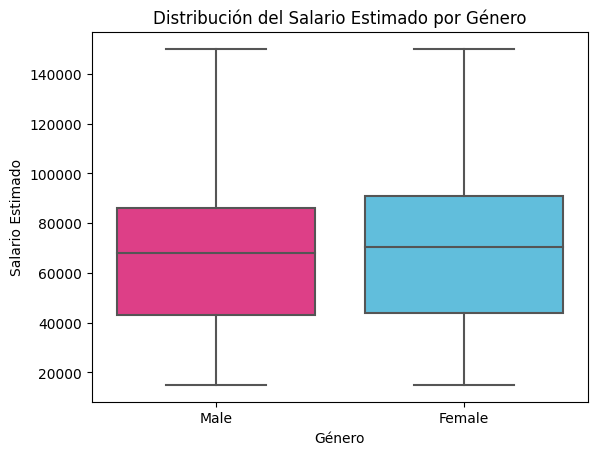

In [164]:
#  gráfico de caja y bigotes
sns.boxplot(data=df, x='Gender', y='EstimatedSalary', palette=paleta)
plt.title('Distribución del Salario Estimado por Género')
plt.xlabel('Género')
plt.ylabel('Salario Estimado')
plt.show()

In [165]:
# Conclusiones

# Se observa que los rangos salariales para hombres y mujeres son similares, sin diferencias significativas entre ellos.
# No se identificaron valores atípicos en la distribución de salarios para ningún género. Aunque la media salarial para mujeres
# es ligeramente superior a la de los hombres, esta diferencia no resulta significativa.

Como se mencionó anteriormente, ya tenemos una variable objetivo, y el análisis debe girar en torno a esta principalmente. Ya tenemos una idea de que los hombres realizan más compras que las mujeres, pero no es una diferencia significativa, al menos no en una primera instancia. Lo que realizaremos ahora será una visualización que nos permita observar la relación entre la variable objetivo , el rango de edad de nuestros datos y el Genero.

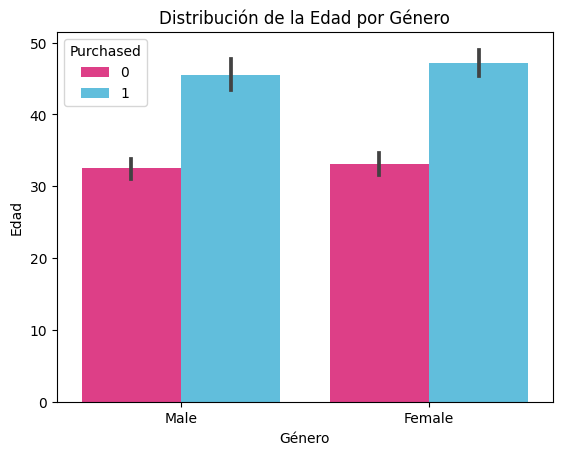

In [166]:
ax = sns.barplot(data=df, x='Gender', y='Age', hue='Purchased', palette=paleta)
plt.title('Distribución de la Edad por Género')
plt.xlabel('Género')
plt.ylabel('Edad')
ax.legend(title='Purchased', loc='upper left')
plt.show()

In [167]:
# Interpretación:

# Se observa que la distribución entre si compra o no con respecto a la edad es similar. Pero podemos notar que el rango de edad que va hasta 30 no realiza compras,
# independientemente del género. Por otra parte, tenemos que aquellos clientes que realizan compras tienen un rango de edad más grande,
# llegando hasta los 50 años aproximadamente. Esto nos brinda información acerca de un punto de corte. Podríamos decir, en un principio,
# que personas mayores a 30-35 años tienen más probabilidad de realizar una compra, independientemente del género. 

Ahora realizaremos un gráfico de caja y bigote que nos ilustre la distribución de la edad con respecto al género de los registros en nuestros datos.

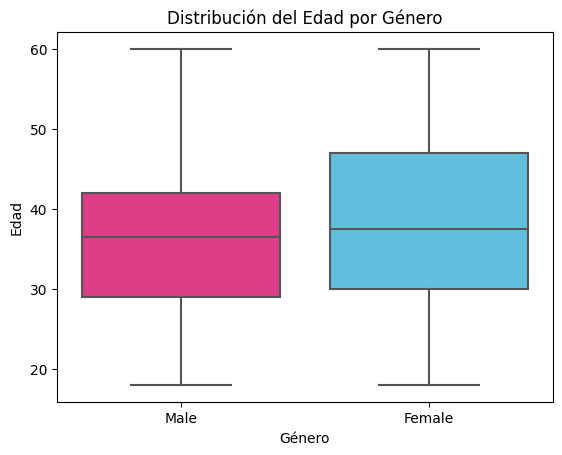

In [168]:
#  gráfico de caja y bigotes
sns.boxplot(data=df, x='Gender', y='Age',palette= paleta)
plt.title('Distribución del Edad por Género')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()

In [169]:
# Conclusiones

# En la gráfica se observa que el rango de edad es similar tanto para hombres como para mujeres. Sin embargo,
# la concentración de edades para las mujeres es más notable, abarcando aproximadamente desde los 30 años hasta los 45 años,
# mientras que para los hombres, la concentración de datos en cuanto a edad llega hasta los 41 años aproximadamente.

Como hemos podido observar en distintas gráficas, ya nos podemos hacer una idea de cómo se relacionan las demás variables con la variable objetivo. Muchas veces, encontrar lo que denomino un "punto de corte" que nos brinde una información clara entre todas las variables con la variable objetivo puede ser desafiante y puede guardar una similitud con encontrar una aguja en un pajar. Pero, a medida que tu capacidad de hacer preguntas a los datos mejora, llegarás más rápido a encontrar información valiosa, aunque no esté relacionada con lo que estabas intentando responder inicialmente. Dado que el conjunto de datos que tenemos contiene pocas variables, es fácil hacer un gráfico que involucre todas las variables. Esto nos dará una claridad mayor acerca de si la compra o no esconde un patrón subyacente.

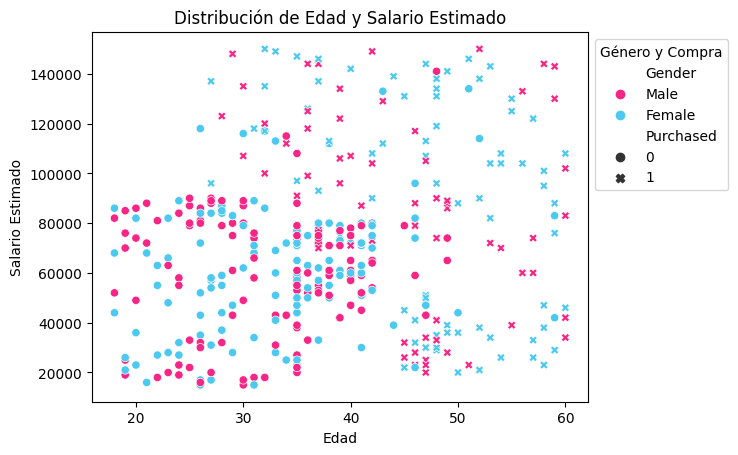

In [170]:
# gráfico de dispersión con colores diferenciados por género y compra
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Gender', style='Purchased',palette= paleta)
plt.title('Distribución de Edad y Salario Estimado')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend(title='Género y Compra', bbox_to_anchor=(1, 1))
plt.show()

In [171]:
# Conclusiones:

# El gráfico nos brinda información importante de manera condensada. Podemos observar que el género está diferenciado por color y
# si el cliente compró o no, por la forma de los puntos. En el eje X, tenemos la edad, y en el eje Y, el salario estimado.

# Se observa que las personas con edades entre 20 y 40 años y salarios de 20,000 a 80,000 no han realizado compras.
# En cambio, aquellos con edades y salarios mayores sí han realizado compras. Esto divide nuestras variables en dos categorías
# con sus respectivos valores: las personas con mayor edad y salario promedio son más propensas a realizar una compra.
# Para resaltar esta diferencia, realizaremos dos gráficos destacando el sector que no realizó una compra.

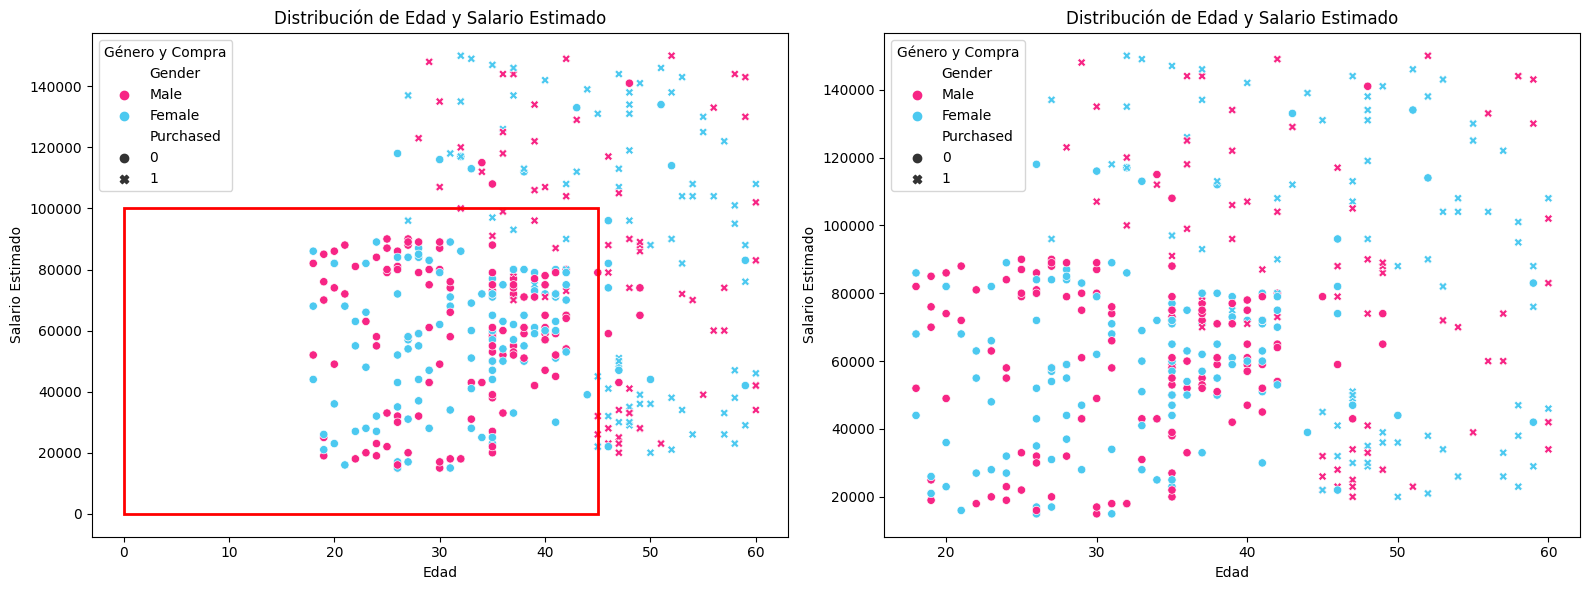

In [172]:
from matplotlib.patches import Rectangle
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Gender', style='Purchased', palette=paleta, ax=axs[0])
axs[0].set_title('Distribución de Edad y Salario Estimado')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Salario Estimado')
axs[0].legend(title='Género y Compra')
# Crear el cuadrado en el primer gráfico
rect = Rectangle((0, 0), 45, 100000, linewidth=2, edgecolor='red', facecolor='none')
axs[0].add_patch(rect)

sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Gender', style='Purchased', palette=paleta, ax=axs[1])
axs[1].set_title('Distribución de Edad y Salario Estimado')
axs[1].set_xlabel('Edad')
axs[1].set_ylabel('Salario Estimado')
axs[1].legend(title='Género y Compra')

plt.tight_layout()
plt.show()

Observamos en el gráfico anterior que el umbral de decisión para la compra está aproximadamente en 100,000. Ahora, realizaremos un gráfico que muestre la proporción de clientes que realizan la compra o no, en intervalos de salarios. Esto nos proporcionará más evidencia visual sobre lo que el gráfico anterior nos mostró.

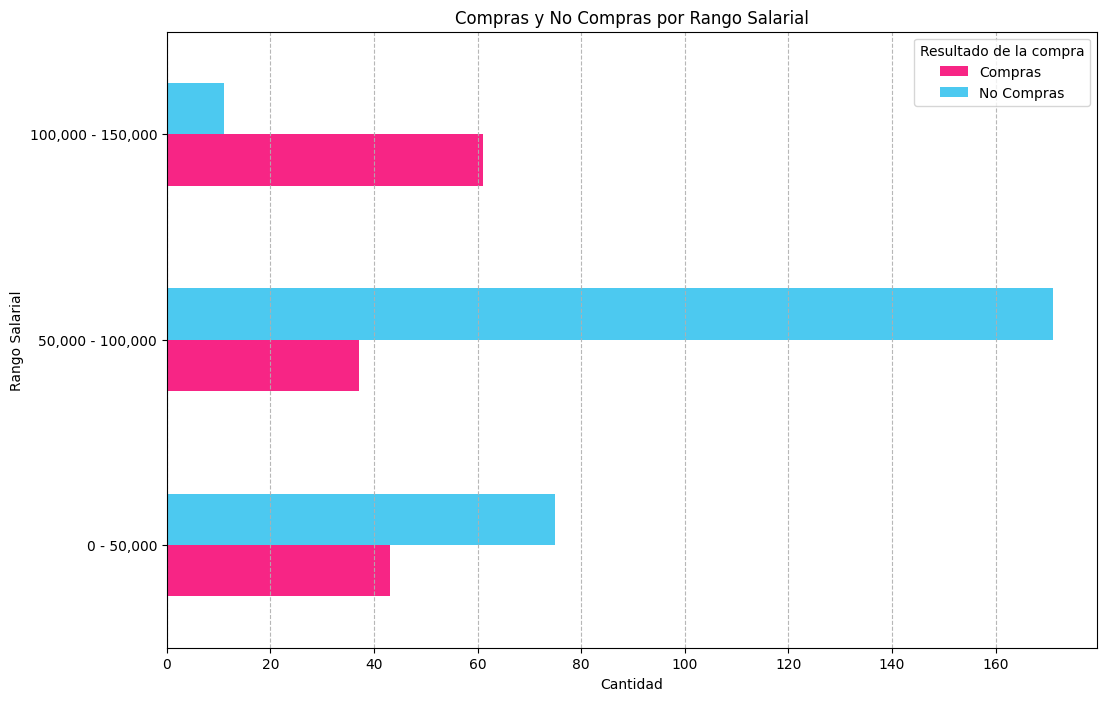

In [173]:
# Define los rangos salariales
bins = [0, 50000, 100000, 150000]

# Crea una nueva columna 'SalaryRange' que categorice los salarios en los rangos definidos
df['SalaryRange'] = pd.cut(df['EstimatedSalary'], bins=bins, right=False, labels=['0 - 50,000', '50,000 - 100,000', '100,000 - 150,000'])

# Calculo la proporción de compras y no compras en cada rango salarial
purchase_ratio = df.groupby('SalaryRange')['Purchased'].mean()

# Calcula el total de compras y no compras en cada rango salarial
total_purchases = df.groupby('SalaryRange')['Purchased'].count()

# Crea un df con las proporciones de compras y no compras
data = pd.DataFrame({'Compras': purchase_ratio * total_purchases, 'No Compras': (1 - purchase_ratio) * total_purchases})

# Grafico la proporción de compras y no compras en cada rango salarial
ax = data.plot(kind='barh', figsize=(12, 8), stacked=False, color=paleta)
plt.title('Compras y No Compras por Rango Salarial')
plt.ylabel('Rango Salarial')
plt.xlabel('Cantidad')
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.legend(title='Resultado de la compra', bbox_to_anchor=(1, 1))

plt.show()

In [174]:
# Conclusion: 

# Al observar el gráfico, se evidencia un punto de corte en el rango salarial que puede influir en la decisión de compra del cliente.
# Dado que estos datos son para práctica, procederemos con la creación de un modelo de regresión logística una vez explorados los datos.

In [175]:
# Elminamos la columna que no nos sirve
df = df.drop(['SalaryRange'],axis=1)

<div style="width: 100%; height: 200px; background-color: #f72585; border-radius: 20px; display: flex; justify-content: center; align-items: center; color: white; font-size: 24px; font-weight: bold; letter-spacing: 2px;">
  Modelado
</div>

A continuación, procederemos a realizar un modelado de regresión logística programando primero la regresión manualmente. Una vez obtenidos los resultados, compararemos estos con los de un modelo previamente programado. El objetivo es observar cómo la ecuación y los conceptos matemáticos nos permiten programar y modelar manualmente, brindándonos una comprensión más profunda del proceso.

In [176]:
# Copiamos Nuestros datos para realizar un modelo con cada copia. 
df2 = df


Para comenzar, se realiza una transformación de la variable categórica 'Gender' en variables numéricas mediante one-hot encoding, lo que permite que el modelo pueda trabajar con esta información. Luego, se divide el conjunto de datos en dos partes: una para entrenar el modelo y otra para evaluar su desempeño. Posteriormente, se estandarizan las características para que tengan una media de 0 y una desviación estándar de 1, lo que facilita el proceso de entrenamiento del modelo. Además, se divide el conjunto de datos en dos partes: una para entrenar el modelo y otra para evaluar su desempeño.

1. **Código:** 
  
     ```python
     df2 = pd.get_dummies(df2, columns=['Gender'], drop_first=True)

     X_train_normalized = (X_train - X_train.mean()) / X_train.std() #Se resta la media y se divide por la desviación estándar.
     X_test_normalized = (X_test - X_test.mean()) / X_test.std()

     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
     ```

Una vez preparados los datos, se añade una columna de unos a las características para introducir el término de sesgo (Intercepto  $\beta 0$ ) en el modelo. Esto permite ajustar el modelo de regresión logística de manera que no tenga que pasar obligatoriamente por el origen, sino que pueda desplazarse verticalmente según sea necesario.

2. - **Código:**
     ```python
     X_train_normalized['Bias'] = 1
     X_test_normalized['Bias'] = 1
     ```

En el proceso de entrenamiento del modelo, se utiliza la función sigmoide para transformar la salida de la función lineal a una probabilidad entre 0 y 1. Los parámetros del modelo se inicializan con ceros y luego se utilizan el descenso de gradiente y la función de coste para ajustar estos parámetros y minimizar la función de coste.

$$
\text{sigmoid}(z) = \frac{1}{1 + \exp(-z)}
$$

 **Código:** `def sigmoid(z): return 1 / (1 + np.exp(-z))`

3. **Inicialización de los Parámetros Beta:**
   - **Explicación:** Se inicializan los parámetros $\beta$ con valores cero.
   - **Código:** `beta = np.zeros(X_train_normalized.shape[1])`

4. **Descenso de Gradiente:**
   - **Explicación:** Se utiliza el descenso de gradiente para ajustar los parámetros  $\beta$  y minimizar la función de costo.
   - **Código:**
     ```python
     lr = 0.01 # Se define una taza de aprendizaje 
     num_iter = 1000 # Se inicia un bucle que iterara n veces (1000)
     for _ in range(num_iter):
         z = np.dot(X_train_normalized, beta) 
         p = sigmoid(z) # Se aplica la funcion sigmoide a Z para obtener las probabilidades predichas (p) de pertenencia a la clase positiva 
         gradient = np.dot(X_train_normalized.T, (p - y_train)) / y_train.size #  Se calcula el gradiente de la función de costo con respecto a los parámetros Beta. este gradiente se utiliza para actualizar los parámetros en la dirección que minimiza la función de costo. 
         beta -= lr * gradient
     ```
-. Se calcula la diferencia entre las probabilidades predichas (p) y las etiquetas reales de entrenamiento (Y_train).

-. Se transpone la matriz de características normalizadas (X_train_normalized.T) para que coincida con las dimensiones del gradiente resultante.

-. Se calcula el producto punto entre la matriz transpuesta de características y la diferencia de probabilidades, y se divide por el tamaño de los datos de entrenamiento (y_train.size).

-. Se actualizan los parámetros Beta restando el producto entre la tasa de aprendizaje (lr) y el gradiente calculado. Este paso se repite en cada iteración para mover los parámetros hacia los valores que minimizan la función de costo.

En el descenso de gradiente, se utiliza el producto punto entre las características normalizadas del modelo y los parámetros actuales de Beta para obtener Z, que es el resultado de la combinación lineal de las características y los parámetros. Este valor Z se utiliza luego para calcular las probabilidades predichas (p) aplicando la función sigmoide a Z.

Durante el entrenamiento, se actualizan los parámetros del modelo en cada iteración del descenso de gradiente, moviéndolos en la dirección que minimiza la función de costo. La función de costo en la regresión logística se calcula mediante la función de pérdida logística o entropía cruzada binaria, que mide qué tan bien el modelo predice la probabilidad de que una observación pertenezca a la clase positiva.

$$
\text{Costo}(\beta) = - \frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})]
$$

Donde:
- $m$ es el número de ejemplos de entrenamiento.
- $y^{(i)}$ es la etiqueta verdadera del $i$-ésimo ejemplo.
- $\hat{y}^{(i)}$ es la predicción del modelo para el $i$-ésimo ejemplo.

En el código, la función de costo no se calcula explícitamente, pero la actualización de los parámetros en el descenso de gradiente se basa en el gradiente de esta función de costo con respecto a los parámetros. La actualización de los parámetros se realiza en la línea:

```python
beta -= lr * gradient
```
**A continuación, se encuentra el código entero:**


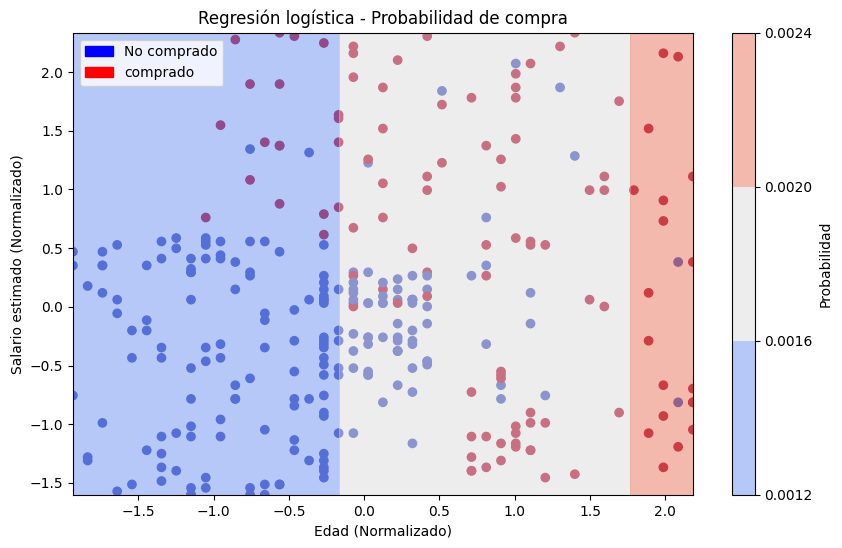

In [177]:

from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches

# Transformo la variable categórica 'Gender' en numérica
df2 = pd.get_dummies(df2, columns=['Gender'], drop_first=True)

# Divido el DF en características (X) y etiqueta (y)
X = df2.drop('Purchased', axis=1)
y = df2['Purchased']

# Divido el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalizo las características
X_train_normalized = (X_train - X_train.mean()) / X_train.std()
X_test_normalized = (X_test - X_test.mean()) / X_test.std()

# Añado una columna de unos para el término de sesgo
X_train_normalized['Bias'] = 1
X_test_normalized['Bias'] = 1

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Inicializo los parámetros beta (sesgo)
beta = np.zeros(X_train_normalized.shape[1])

# Descenso de gradiente
lr = 0.01
num_iter = 1000
for _ in range(num_iter):
    z = np.dot(X_train_normalized, beta)
    p = sigmoid(z)
    gradient = np.dot(X_train_normalized.T, (p - y_train)) / y_train.size
    beta -= lr * gradient

# Función de predicción
def predict(X, beta):
    return sigmoid(np.dot(X, beta))

# Grafico los datos y la función de predicción
plt.figure(figsize=(10, 6))
plt.scatter(X_train_normalized['Age'], X_train_normalized['EstimatedSalary'], c=y_train, cmap='coolwarm')
x_vals = np.linspace(X_train_normalized['Age'].min(), X_train_normalized['Age'].max(), 100)
y_vals = np.linspace(X_train_normalized['EstimatedSalary'].min(), X_train_normalized['EstimatedSalary'].max(), 100)
X_vals, Y_vals = np.meshgrid(x_vals, y_vals)
Z = np.column_stack((np.ravel(X_vals), np.ravel(Y_vals), np.ones(X_vals.size)))
Z_normalized = (Z - X_train.mean().values) / X_train.std().values
Z_normalized = np.column_stack((Z_normalized, np.ones(Z_normalized.shape[0])))
Z_predicted = predict(Z_normalized, beta).reshape(X_vals.shape)
plt.contourf(X_vals, Y_vals, Z_predicted, alpha=0.5, levels=1, cmap='coolwarm')
plt.colorbar(label='Probabilidad')
plt.xlabel('Edad (Normalizado)')
plt.ylabel('Salario estimado (Normalizado)')
plt.title('Regresión logística - Probabilidad de compra')
plt.legend(handles=[mpatches.Patch(color='blue', label='No comprado'), mpatches.Patch(color='red', label='comprado')])
plt.show()


In [178]:
# Interpretación del Gráfico:

# El gráfico generado muestra el resultado del modelo de regresión logística

# 1. Puntos de datos: Los puntos dispersos en el gráfico representan los datos de entrenamiento. Cada punto tiene una edad (en el eje X) y un salario estimado (en el eje Y).
# Los puntos están coloreados según si la persona realizó una compra (color diferente) o no (color igual).

# 2. Fondo de colores: El fondo del gráfico está coloreado según las predicciones del modelo. Las áreas más rojas indican una mayor probabilidad de que una persona
# compre el producto, según el modelo. Las áreas más azules indican una menor probabilidad de compra.

# 3. Contornos de decisión: Los contornos en el fondo de colores representan los límites de decisión del modelo. En este caso,
# como solo tenemos dos clases (compró o no compró), hay un solo límite que separa las dos clases. Este límite es donde la probabilidad de compra es del 50%.

# 4. Interpretación de colores:
#   - Azul: Representa una baja probabilidad de compra. Los puntos azules en la gráfica corresponden a las personas con una baja edad y un salario estimado bajo o medio, lo que sugiere que es menos probable que compren el producto.
#   - Rojo: Indica una alta probabilidad de compra. Los puntos rojos en la gráfica representan a las personas con una edad moderada /Alta y un salario estimado medio/ alto, lo que sugiere que es más probable que compren el producto.
#   - Blanco: Representa un área donde el modelo no puede decidir claramente la probabilidad. Esto puede deberse a la falta de datos en esa región o a la complejidad del problema en esa zona específica del espacio de características.

#  En general,se puede interpretar este gráfico diciendo que, según el modelo, las personas con salarios más altos y edades más altas tienden a comprar más que las personas con salarios más bajos y edades más jóvenes. Sin embargo, 
#  es un modelo simple y las decisiones de compra pueden depender de muchos otros factores que no se están considerando aquí.

# El mapa de colores nos permite identificar visualmente las regiones donde es más probable que las personas compren (rojo), donde es menos probable (azul) y donde el modelo tiene dificultades para tomar una decisión clara (blanco).


Una vez realizado un modelo simple de regresión logística, procederemos a calcular su matriz de confusión. La matriz de confusión nos permitirá evaluar la precisión del modelo al predecir las etiquetas de clase.

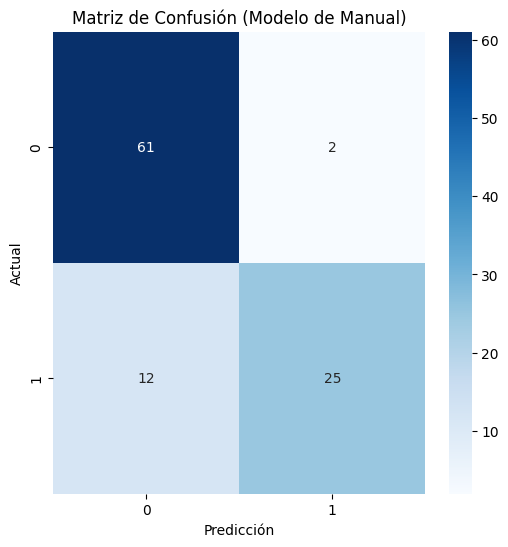

In [184]:
from sklearn.metrics import confusion_matrix

# Predecimos las etiquetas de clase para los datos de prueba
y_pred = (predict(X_test_normalized, beta) > 0.5).astype(int)

# Creamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión (Modelo de Manual)')
plt.show()


Por el momento, reservaremos las interpretaciones de la matriz de confusión para cuando tengamos la matriz de confusión del modelo preprogramado, con el fin de comparar ambos modelos.

In [180]:
# Importamos las librerias
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [181]:
# Transformo las variables categóricas
df = pd.get_dummies(df, drop_first=True)

# Divido los datos en características (X) y etiqueta (y)
X = df.drop('Purchased', axis=1)
y = df['Purchased']

# Divido el df en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Escalo las variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creo y entreno el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizo las predicciones
y_pred = model.predict(X_test)

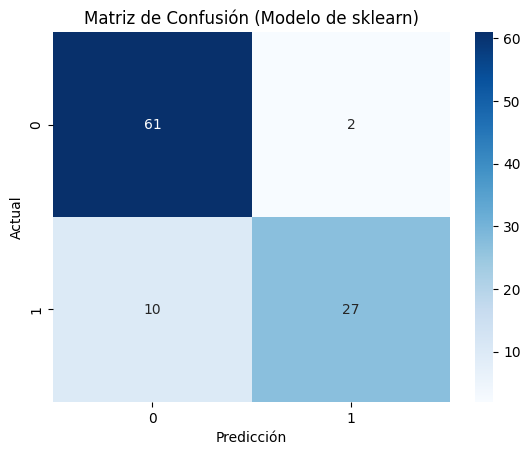

In [183]:
# Creamos Matriz de confusion de modelo pre programado
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (Modelo de sklearn)')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()


## **Análisis de Resultados**

Los resultados de dos modelos de regresión logística: uno implementado manualmente y otro utilizando una librería ya programada. Ambos modelos muestran resultados similares en cuanto a sus predicciones, lo que sugiere que la implementación manual es efectiva y produce resultados comparables a los de la librería.

## **Matriz de Confusión - Regresión Logística Manual:**
- Verdaderos positivos: 25
- Falsos positivos: 2
- Verdaderos negativos: 61
- Falsos negativos: 12

## **Matriz de Confusión - Regresión Logística Ya Programada:**
- Verdaderos positivos: 27
- Falsos positivos: 2
- Verdaderos negativos: 61
- Falsos negativos: 10

Ambos modelos muestran un buen desempeño al predecir los casos negativos, con un número similar de aciertos y errores en esta categoría. Sin embargo, en los casos positivos, el modelo ya programado tiene una ligera ventaja al predecir correctamente dos casos más que el modelo manual. En cuanto a los errores, ambos modelos tienen el mismo número de falsos positivos, pero el modelo manual tiene dos falsos negativos adicionales en comparación con el modelo ya programado.

Es importante destacar que este análisis es un complemento del artículo en el blog Nodo-Data, donde se explica detalladamente el funcionamiento de la regresión logística y su capacidad para predecir etiquetas. La regresión logística utiliza una combinación lineal de variables que se transforma mediante la función logit inversa, convirtiéndola en una probabilidad de pertenencia a una clase. Esta transformación se basa en la relación de la función logit con la fórmula de las probabilidades(Odds). El punto de corte (automáticamente establecido en 50 por el algoritmo) determina si una observación pertenece o no a una clase.

Espero que este análisis y el artículo del blog hayan sido útiles para comprender el funcionamiento de la regresión logística. No dudes en compartir tus comentarios o preguntas para mejorar aún más este análisis. ¡Gracias por tu interés y dedicación! 👽